<a href="https://colab.research.google.com/github/PiasTanmoy/Ensemble-Learning-and-Result-Analysis/blob/main/ML_Ensemble_Learning_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# References
https://towardsdatascience.com/ensembling-convnets-using-keras-237d429157eb

https://github.com/PacktPublishing/Hands-On-Ensemble-Learning-with-Python/tree/master/Chapter04 

https://github.com/mmxmb/keras_ensemblng/blob/master/keras_ensembling.ipynb

https://www.youtube.com/watch?v=xtTyEoJ31Vg&ab_channel=UnfoldDataScience 

https://machinelearningmastery.com/ensemble-methods-for-deep-learning-neural-networks/ 

https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

# Stacking - Hard Voting 
Raw code for understading

In [ ]:
#  --- SECTION 1 ---
# Import the required libraries
from sklearn import datasets, linear_model, svm, neighbors
from sklearn.metrics import accuracy_score
from numpy import argmax
# Load the dataset
breast_cancer = datasets.load_breast_cancer()
x, y = breast_cancer.data, breast_cancer.target

#  --- SECTION 2 ---
# Instantiate the learners (classifiers)
learner_1 = neighbors.KNeighborsClassifier(n_neighbors=5)
learner_2 = linear_model.Perceptron(tol=1e-2, random_state=0)
learner_3 = svm.SVC(gamma=0.001)

#  --- SECTION 3 ---
# Split the train and test samples
test_samples = 100
x_train, y_train = x[:-test_samples], y[:-test_samples]
x_test, y_test = x[-test_samples:], y[-test_samples:]

# Fit learners with the train data
learner_1.fit(x_train, y_train)
learner_2.fit(x_train, y_train)
learner_3.fit(x_train, y_train)

#  --- SECTION 4 ---
# Each learner predicts the classes of the test data
predictions_1 = learner_1.predict(x_test)
predictions_2 = learner_2.predict(x_test)
predictions_3 = learner_3.predict(x_test)

#  --- SECTION 5 ---
# We combine the predictions with hard voting
hard_predictions = []
# For each predicted sample
for i in range(test_samples):
    # Count the votes for each class
    counts = [0 for _ in range(2)]
    counts[predictions_1[i]] = counts[predictions_1[i]]+1
    counts[predictions_2[i]] = counts[predictions_2[i]]+1
    counts[predictions_3[i]] = counts[predictions_3[i]]+1
    # Find the class with most votes
    final = argmax(counts)
    # Add the class to the final predictions
    hard_predictions.append(final)

#  --- SECTION 6 ---
# Accuracies of base learners
print('L1:', accuracy_score(y_test, predictions_1))
print('L2:', accuracy_score(y_test, predictions_2))
print('L3:', accuracy_score(y_test, predictions_3))
# Accuracy of hard voting
print('-'*30)
print('Hard Voting:', accuracy_score(y_test, hard_predictions))


L1: 0.94
L2: 0.78
L3: 0.88
------------------------------
Hard Voting: 0.9


# Stacking - Hard Voting 
Using Library

In [ ]:

#  --- SECTION 1 ---
# Import the required libraries
from sklearn import datasets, naive_bayes, svm, neighbors
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
# Load the dataset
breast_cancer = datasets.load_breast_cancer()
x, y = breast_cancer.data, breast_cancer.target

# Split the train and test samples
test_samples = 100
x_train, y_train = x[:-test_samples], y[:-test_samples]
x_test, y_test = x[-test_samples:], y[-test_samples:]

#  --- SECTION 2 ---
# Instantiate the learners (classifiers)
learner_1 = neighbors.KNeighborsClassifier(n_neighbors=5)
learner_2 = linear_model.Perceptron(tol=1e-2, random_state=0)
learner_3 = svm.SVC(gamma=0.001)

#  --- SECTION 3 ---


# Instantiate the voting classifier
voting = VotingClassifier([('KNN', learner_1),
                           ('NB', learner_2),
                           ('SVM', learner_3)],
                            voting='hard')

#  --- SECTION 4 ---
# Fit classifier with the training data
voting.fit(x_train, y_train)
learner_1.fit(x_train, y_train)
learner_2.fit(x_train, y_train)
learner_3.fit(x_train, y_train)

#  --- SECTION 5 ---
# Predict the most probable class
hard_predictions = voting.predict(x_test)

#  --- SECTION 6 ---
# Get the base learner predictions
predictions_1 = learner_1.predict(x_test)
predictions_2 = learner_2.predict(x_test)
predictions_3 = learner_3.predict(x_test)

#  --- SECTION 7 ---
# Accuracies of base learners
print('L1:', accuracy_score(y_test, predictions_1))
print('L2:', accuracy_score(y_test, predictions_2))
print('L3:', accuracy_score(y_test, predictions_3))
# Accuracy of hard voting
print('-'*30)
print('Hard Voting:', accuracy_score(y_test, hard_predictions))

L1: 0.94
L2: 0.78
L3: 0.88
------------------------------
Hard Voting: 0.9


# Stacking - Soft Voting 
Using Library

In [ ]:

#  --- SECTION 1 ---
# Import the required libraries
from sklearn import datasets, naive_bayes, svm, neighbors
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
# Load the dataset
breast_cancer = datasets.load_breast_cancer()
x, y = breast_cancer.data, breast_cancer.target

# Split the train and test samples
test_samples = 100
x_train, y_train = x[:-test_samples], y[:-test_samples]
x_test, y_test = x[-test_samples:], y[-test_samples:]

#  --- SECTION 2 ---
# Instantiate the learners (classifiers)
learner_1 = neighbors.KNeighborsClassifier(n_neighbors=5)
learner_2 = naive_bayes.GaussianNB()
learner_3 = svm.SVC(gamma=0.001, probability=True)

#  --- SECTION 3 ---

# Instantiate the voting classifier
voting = VotingClassifier([('KNN', learner_1),
                           ('NB', learner_2),
                           ('SVM', learner_3)],
                            voting='soft')

#  --- SECTION 4 ---
# Fit classifier with the training data
voting.fit(x_train, y_train)
learner_1.fit(x_train, y_train)
learner_2.fit(x_train, y_train)
learner_3.fit(x_train, y_train)

#  --- SECTION 5 ---
# Predict the most probable class
soft_predictions = voting.predict(x_test)

#  --- SECTION 6 ---
# Get the base learner predictions
predictions_1 = learner_1.predict(x_test)
predictions_2 = learner_2.predict(x_test)
predictions_3 = learner_3.predict(x_test)

#  --- SECTION 7 ---
# Accuracies of base learners
print('L1:', accuracy_score(y_test, predictions_1))
print('L2:', accuracy_score(y_test, predictions_2))
print('L3:', accuracy_score(y_test, predictions_3))
# Accuracy of hard voting
print('-'*30)
print('Soft Voting:', accuracy_score(y_test, soft_predictions))



L1: 0.94
L2: 0.96
L3: 0.88
------------------------------
Soft Voting: 0.94


# Stacking - Meta Learning

In [ ]:
#  --- SECTION 1 ---
# Import the required libraries
import six
import sys
sys.modules['sklearn.externals.six'] = six

from sklearn import datasets, naive_bayes, svm, neighbors, model_selection
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from mlxtend.classifier import StackingClassifier 
from sklearn.linear_model import LogisticRegression

# Load the dataset
breast_cancer = datasets.load_breast_cancer()
x, y = breast_cancer.data, breast_cancer.target

# Split the train and test samples
test_samples = 100
x_train, y_train = x[:-test_samples], y[:-test_samples]
x_test, y_test = x[-test_samples:], y[-test_samples:]

#  --- SECTION 2 ---
# Instantiate the learners (classifiers)
learner_1 = neighbors.KNeighborsClassifier(n_neighbors=5)
learner_2 = naive_bayes.GaussianNB()
learner_3 = svm.SVC(gamma=0.001, probability=True)

base_classifiers = [learner_1, learner_2, learner_3]

meta_learner = LogisticRegression()

#  --- SECTION 3 ---
stacking_classifier = StackingClassifier(classifiers=base_classifiers,
                                         meta_classifier=meta_learner)

#  --- SECTION 4 ---
# Fit classifier, Predict, and Score using K-Cross validation (Library)
classifiers = [learner_1, learner_2, learner_3, stacking_classifier]
classifiers_name = ['KNN', 'Naive Bayes', 'SVM', 'Stacking Classifier']

scores_learner_1 = model_selection.cross_val_score(learner_1, x_train, y_train, cv=3, scoring='accuracy')
print("Accuracy: %0.3f (+/- %0.3f [%s]" % (scores_learner_1.mean(), scores_learner_1.std(), "KNN"))

scores_learner_2 = model_selection.cross_val_score(learner_2, x_train, y_train, cv=3, scoring='accuracy')
print("Accuracy: %0.3f (+/- %0.3f [%s]" % (scores_learner_2.mean(), scores_learner_2.std(), "Naive Bayes"))

scores_learner_3 = model_selection.cross_val_score(learner_3, x_train, y_train, cv=3, scoring='accuracy')
print("Accuracy: %0.3f (+/- %0.3f [%s]" % (scores_learner_3.mean(), scores_learner_3.std(), "SVM"))

scores_stacking_classifier = model_selection.cross_val_score(stacking_classifier, x_train, y_train, cv=3, scoring='accuracy')
print("Accuracy: %0.3f (+/- %0.3f [%s]" % (scores_stacking_classifier.mean(), scores_stacking_classifier.std(), "Stacking Classifier"))

print("-"*50)

#  --- SECTION 4 ---
# Alternative using loop. This is useful for large number of classifiers. 
for classifier, name in zip(classifiers, classifiers_name):
  scores = model_selection.cross_val_score(classifier, x_train, y_train, cv=3, scoring='accuracy')
  print("Accuracy: %0.3f (+/- %0.3f [%s]" % (scores.mean(), scores.std(), name))

Accuracy: 0.928 (+/- 0.030 [KNN]
Accuracy: 0.940 (+/- 0.017 [Naive Bayes]
Accuracy: 0.919 (+/- 0.008 [SVM]
Accuracy: 0.934 (+/- 0.021 [Stacking Classifier]
--------------------------------------------------
Accuracy: 0.928 (+/- 0.030 [KNN]
Accuracy: 0.940 (+/- 0.017 [Naive Bayes]
Accuracy: 0.919 (+/- 0.008 [SVM]
Accuracy: 0.934 (+/- 0.021 [Stacking Classifier]


# Meta Learning - Binary Class

In [ ]:
# --- SECTION 1 ---
# Libraries and data loading
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn import metrics
import numpy as np
import warnings
warnings.filterwarnings('ignore')

bc = load_breast_cancer()


train_x, train_y = bc.data[:400], bc.target[:400]
test_x, test_y = bc.data[400:], bc.target[400:]

# --- SECTION 2 ---
# Create the ensemble's base learners and meta learner
# Append base learners to a list for ease of access
base_learners = []

knn = KNeighborsClassifier(n_neighbors=2)
base_learners.append(knn)

dtr = DecisionTreeClassifier(max_depth=4, random_state=123456)
base_learners.append(dtr)

mlpc = MLPClassifier(hidden_layer_sizes =(100, ), solver='lbfgs', random_state=123456)
base_learners.append(mlpc)

meta_learner = LogisticRegression(solver='lbfgs')


# --- SECTION 3 ---
# Create the training meta data

# Create variables to store meta data and their targets
meta_data = np.zeros((len(base_learners), len(train_x)))
meta_targets = np.zeros(len(train_x))

# Create the cross-validation folds
KF = KFold(n_splits=5)
meta_index = 0
for train_indices, test_indices in KF.split(train_x):
    # Train each learner on the K-1 folds and create meta data for the Kth fold
    for i in range(len(base_learners)):
        learner = base_learners[i]

        learner.fit(train_x[train_indices], train_y[train_indices])
        predictions = learner.predict_proba(train_x[test_indices])[:,0]

        meta_data[i][meta_index:meta_index+len(test_indices)] = predictions

    meta_targets[meta_index:meta_index+len(test_indices)] = train_y[test_indices]
    meta_index += len(test_indices)

# Transpose the meta data to be fed into the meta learner
meta_data = meta_data.transpose()

# --- SECTION 4 ---
# Create the meta data for the test set and evaluate the base learners
test_meta_data = np.zeros((len(base_learners), len(test_x)))
base_acc = []
for i in range(len(base_learners)):
    learner = base_learners[i]
    learner.fit(train_x, train_y)
    predictions = learner.predict_proba(test_x)[:,0]
    test_meta_data[i] = predictions

    acc = metrics.accuracy_score(test_y, learner.predict(test_x))


    base_acc.append(acc)

test_meta_data = test_meta_data.transpose()

# --- SECTION 5 ---
# Fit the meta learner on the train set and evaluate it on the test set
meta_learner.fit(meta_data, meta_targets)
ensemble_predictions = meta_learner.predict(test_meta_data)

acc = metrics.accuracy_score(test_y, ensemble_predictions)

# --- SECTION 6 ---
# Print the results
print('Acc  Name')
print('-'*20)
for i in range(len(base_learners)):
    learner = base_learners[i]

    print(f'{base_acc[i]:.2f} {learner.__class__.__name__}')
print(f'{acc:.2f} Ensemble')

Acc  Name
--------------------
0.86 KNeighborsClassifier
0.88 DecisionTreeClassifier
0.90 MLPClassifier
0.94 Ensemble


# Meta Learning - Multiclass

In [ ]:
# --- SECTION 1 ---
# Libraries and data loading
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np
import warnings
warnings.filterwarnings('ignore')

bc = load_breast_cancer()
X = bc.data
y = bc.target

train_x, train_y = bc.data[:400], bc.target[:400]
test_x, test_y = bc.data[400:], bc.target[400:]

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=123456)

# --- SECTION 2 ---
# Create the ensemble's base learners and meta learner
# Append base learners to a list for ease of access
base_learners = []

knn = KNeighborsClassifier(n_neighbors=2)
base_learners.append(knn)

dtr = DecisionTreeClassifier(max_depth=4, random_state=123456)
base_learners.append(dtr)

mlpc = MLPClassifier(hidden_layer_sizes =(100, ), solver='lbfgs', random_state=123456)
base_learners.append(mlpc)

meta_learner = LogisticRegression(solver='lbfgs')


# --- SECTION 3 ---
# Create the training meta data

# Create variables to store meta data and their targets
n_class = 2
meta_data = np.zeros((len(base_learners)*n_class, len(train_x)))
meta_targets = np.zeros(len(train_x))

# Create the cross-validation folds
KF = KFold(n_splits=5)
meta_index = 0
for train_indices, test_indices in KF.split(train_x):
    # Train each learner on the K-1 folds and create meta data for the Kth fold
    for i in range(len(base_learners)):
        learner = base_learners[i]

        learner.fit(train_x[train_indices], train_y[train_indices])
        predictions = learner.predict_proba(train_x[test_indices])

        for c in range(n_class):
          meta_data[i+c][meta_index:meta_index+len(test_indices)] = predictions[:, c]

    meta_targets[meta_index:meta_index+len(test_indices)] = train_y[test_indices]
    meta_index += len(test_indices)

# Transpose the meta data to be fed into the meta learner
meta_data = meta_data.transpose()

# --- SECTION 4 ---
# Create the meta data for the test set and evaluate the base learners
test_meta_data = np.zeros((len(base_learners)*n_class, len(test_x)))
base_acc = []
for i in range(len(base_learners)):
    learner = base_learners[i]
    learner.fit(train_x, train_y)
    predictions = learner.predict_proba(test_x)

    for c in range(n_class):
      test_meta_data[i+c] = predictions[:,c]

    acc = metrics.accuracy_score(test_y, learner.predict(test_x))
    base_acc.append(acc)

test_meta_data = test_meta_data.transpose()


# --- SECTION 5 ---
# Fit the meta learner on the train set and evaluate it on the test set
meta_learner.fit(meta_data, meta_targets)
pred_y = meta_learner.predict(test_meta_data)
pred_pr_y = meta_learner.predict_proba(test_meta_data)


acc = metrics.accuracy_score(test_y, pred_y)

# --- SECTION 6 ---
# Print the results
print('Acc  Name')
print('-'*20) 
for i in range(len(base_learners)):
    learner = base_learners[i]

    print(f'{base_acc[i]:.2f} {learner.__class__.__name__}')
print(f'{acc:.2f} Ensemble')

Acc  Name
--------------------
0.89 KNeighborsClassifier
0.93 DecisionTreeClassifier
0.92 MLPClassifier
0.94 Ensemble


# Result Analysis

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       0.95      0.88      0.92        43
           1       0.93      0.97      0.95        71

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y, pred_y)

0.9385964912280702

In [ ]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(test_y, pred_y, pos_label=1)
metrics.auc(fpr, tpr)

0.9277759580740256

In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
roc_auc_score(test_y, pred_y)

0.9277759580740256

In [ ]:
from sklearn.metrics import precision_recall_curve, auc
precision, recall, thresholds = precision_recall_curve(test_y, pred_y)
auc(recall, precision)

0.9609036389985242

In [ ]:
from sklearn.metrics import average_precision_score
average_precision_score(test_y, pred_y)

0.9237105897595149

In [ ]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(test_y, pred_y)

0.9277759580740256

In [ ]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(test_y, pred_y)
cf

array([[38,  5],
       [ 2, 69]])

In [ ]:
def counts_from_confusion(confusion):
    """
    Obtain TP, FN FP, and TN for each class in the confusion matrix
    """

    counts_list = []

    # Iterate through classes and store the counts
    for i in range(confusion.shape[0]):
        tp = confusion[i, i]

        fn_mask = np.zeros(confusion.shape)
        fn_mask[i, :] = 1
        fn_mask[i, i] = 0
        fn = np.sum(np.multiply(confusion, fn_mask))

        fp_mask = np.zeros(confusion.shape)
        fp_mask[:, i] = 1
        fp_mask[i, i] = 0
        fp = np.sum(np.multiply(confusion, fp_mask))

        tn_mask = 1 - (fn_mask + fp_mask)
        tn_mask[i, i] = 0
        tn = np.sum(np.multiply(confusion, tn_mask))

        counts_list.append({'Class': i,
                            'TP': tp,
                            'FN': fn,
                            'FP': fp})

    return counts_list
counts_from_confusion(cf)

[{'Class': 0, 'FN': 5.0, 'FP': 2.0, 'TP': 38},
 {'Class': 1, 'FN': 2.0, 'FP': 5.0, 'TP': 69}]

# AU-ROC

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.928


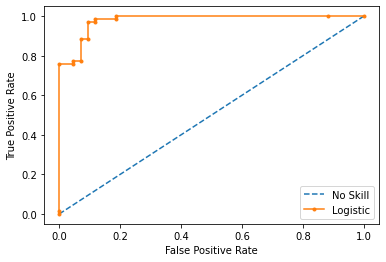

In [ ]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot



# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(test_y))]


# keep probabilities for the positive outcome only
lr_probs = pred_pr_y[:, 1]
# calculate scores
ns_auc = roc_auc_score(test_y, ns_probs)
lr_auc = roc_auc_score(test_y, pred_y)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))


# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(test_y, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(test_y, lr_probs)


# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# AU-PRC

Logistic: f1=0.952 auc=0.987


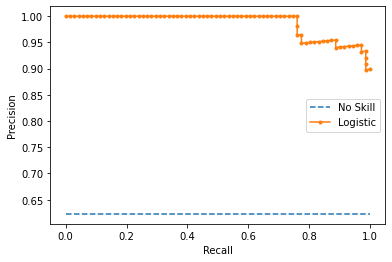

In [ ]:
# precision-recall curve and f1
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

lr_probs = pred_pr_y[:, 1]
# predict class values
yhat = pred_y
lr_precision, lr_recall, _ = precision_recall_curve(test_y, lr_probs)
lr_f1, lr_auc = f1_score(test_y, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(test_y[test_y==1]) / len(test_y)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Meta Learning - Neural Network

In [ ]:
import tensorflow as tf
from keras.callbacks import History
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.datasets import cifar10
from keras.engine import training
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, Activation, Average
from keras.losses import categorical_crossentropy
from keras.models import Model, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.python.framework.ops import Tensor
from typing import Tuple, List
import glob
import numpy as np
import os

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

def model(model_input = 30):
  
  model = Sequential()
  model.add(Dense(64, input_dim=model_input, activation='relu'))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(2, activation="softmax"))
  
  return model


In [ ]:
model_input = Input(shape=30)
model1 = model(model_input)
model1.compile("adam", "categorical_crossentropy", metrics=["accuracy"])
model1.fit(X, Y, epochs=10, verbose=0)
model1.evaluate(X, Y, verbose=0)[1]

0.9156414866447449

In [ ]:
model_input = Input(shape=30)
model2 = model(model_input)
model2.compile("adam", "categorical_crossentropy", metrics=["accuracy"])
model2.fit(X, Y, epochs=20, verbose=0)
model2.evaluate(X, Y, verbose=0)[1]

0.9384886026382446

In [ ]:
model_input = Input(shape=30)
model3 = model(model_input)
model3.compile("adam", "categorical_crossentropy", metrics=["accuracy"])
model3.fit(X, Y, epochs=50, verbose=0)
model3.evaluate(X, Y, verbose=0)[1]

0.9314587116241455

In [ ]:
# --- SECTION 1 ---
# Libraries and data loading
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

bc = load_breast_cancer()
X = bc.data
y = bc.target

train_x, train_y = bc.data[:400], bc.target[:400]
test_x, test_y = bc.data[400:], bc.target[400:]

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=123456)

train_y = to_categorical(train_y)

model_input = X.shape[1]
n_class = 2

# --- SECTION 2 ---
# Create the ensemble's base learners and meta learner
# Append base learners to a list for ease of access
base_learners = []

model1 = model(model_input)
model1.compile("adam", "categorical_crossentropy", metrics=["accuracy"])
base_learners.append(model1)

model2 = model(model_input)
model2.compile("adam", "categorical_crossentropy", metrics=["accuracy"])
base_learners.append(model2)

model3 = model(model_input)
model3.compile("adam", "categorical_crossentropy", metrics=["accuracy"])
base_learners.append(model3)

meta_learner = model(len(base_learners)*n_class)
meta_learner.compile("adam", "categorical_crossentropy", metrics=["accuracy"])

# --- SECTION 3 ---
# Create the training meta data

# Create variables to store meta data and their targets

meta_data = np.zeros((len(base_learners)*n_class, len(train_x)))
meta_targets = np.zeros( (len(train_x),n_class) )

# Create the cross-validation folds
KF = KFold(n_splits=5)
meta_index = 0
for train_indices, test_indices in KF.split(train_x):
    # Train each learner on the K-1 folds and create meta data for the Kth fold
    for i in range(len(base_learners)):
        learner = base_learners[i]

        learner.fit(train_x[train_indices], train_y[train_indices])
        predictions = learner.predict_generator(train_x[test_indices])

        for c in range(n_class):
          meta_data[i+c][meta_index:meta_index+len(test_indices)] = predictions[:, c]

    meta_targets[meta_index:meta_index+len(test_indices)] = train_y[test_indices]
    meta_index += len(test_indices)

# Transpose the meta data to be fed into the meta learner
meta_data = meta_data.transpose()
meta_data.shape, meta_targets.shape

12/12 [==============================] - 0s 3ms/step - loss: 0.5978 - accuracy: 0.8681


((455, 6), (455, 2))

In [ ]:

# --- SECTION 4 ---
# Create the meta data for the test set and evaluate the base learners
test_meta_data = np.zeros((len(base_learners)*n_class, len(test_x)))
base_acc = []
for i in range(len(base_learners)):
    learner = base_learners[i]
    learner.fit(train_x, train_y)
    predictions = learner.predict_generator(test_x)

    for c in range(n_class):
      test_meta_data[i+c] = predictions[:,c]

    pred_y = np.argmax(learner.predict(test_x), axis=1)
    acc = metrics.accuracy_score(test_y, pred_y)
    base_acc.append(acc)

test_meta_data = test_meta_data.transpose()
test_meta_data.shape

15/15 [==============================] - 0s 3ms/step - loss: 0.5494 - accuracy: 0.8527


(114, 6)

In [ ]:
# --- SECTION 5 ---
# Fit the meta learner on the train set and evaluate it on the test set
meta_learner.fit(meta_data, meta_targets)
pred_y = np.argmax(meta_learner.predict(test_meta_data), axis=1) 
pred_pr_y = meta_learner.predict_generator(test_meta_data)

acc = metrics.accuracy_score(test_y, pred_y)

# --- SECTION 6 ---
# Print the results
print('Acc  Name')
print('-'*20) 
for i in range(len(base_learners)):
    learner = base_learners[i]

    print(f'{base_acc[i]:.2f} {learner.__class__.__name__}')
print(f'{acc:.2f} Ensemble')

15/15 [==============================] - 0s 5ms/step - loss: 0.5772 - accuracy: 0.8440
Acc  Name
--------------------
0.62 Sequential
0.89 Sequential
0.84 Sequential
0.87 Ensemble
